# Linear Regression Implementation

This notebook implements linear regression from scratch. Let's explore the mathematical concepts, implementation details, and visualizations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression as SklearnLinearRegression

The equation of a simple linear regression model is:
\[ Y = wX + b \]
where:
- **X** is the input feature
- **w** (weight) is the slope
- **b** (bias) is the intercept
- **Y** is the predicted output
"""

In [2]:
#sample data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

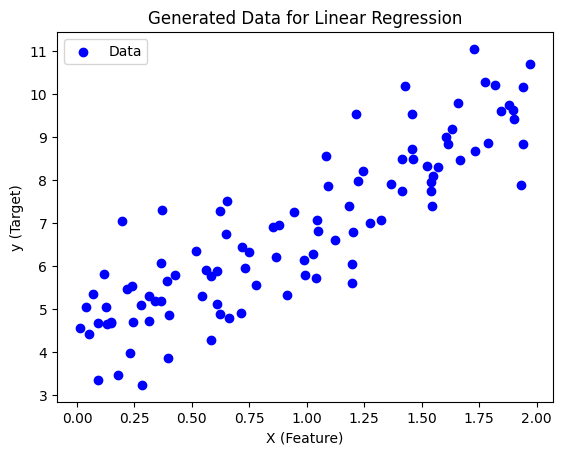

In [3]:
#data visu
plt.scatter(X, y, color='blue', label='Data')
plt.xlabel("X (Feature)")
plt.ylabel("y (Target)")
plt.title("Generated Data for Linear Regression")
plt.legend()
plt.show()


"""
## Cost Function
We use **Mean Squared Error (MSE)** as the cost function:
\[ J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (f_wb - y_i)^2 \]
This measures how well our model is predicting the target variable.
"""

In [4]:

def compute_cost(x, y, w, b):
    m = x.shape[0]

    cost_sum = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum = cost_sum + cost
    total_cost = (1 / (2 * m)) * cost_sum

    return total_cost

## Gradient Descent
Gradient Descent is an optimization algorithm used to minimize the cost function by updating parameters iteratively.
The update rule:
\[ w := w - \alpha \frac{\partial J}{\partial w} \]
\[ b := b - \alpha \frac{\partial J}{\partial b} \]
where **\alpha** is the learning rate.

In [5]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

def gradient_descent(X, y, w_init, b_init, alpha, num_iters):
    w, b = w_init, b_init
    cost_history = []
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)
        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}")
    return w, b, cost_history

In [6]:
# Train Model
w_init, b_init = 0, 0
alpha = 0.1
num_iters = 1000
w_opt, b_opt, cost_history = gradient_descent(X_train, y_train, w_init, b_init, alpha, num_iters)


Iteration 0: Cost [15.76147873]
Iteration 100: Cost [0.42814094]
Iteration 200: Cost [0.42399229]
Iteration 300: Cost [0.42384486]
Iteration 400: Cost [0.42383962]
Iteration 500: Cost [0.42383944]
Iteration 600: Cost [0.42383943]
Iteration 700: Cost [0.42383943]
Iteration 800: Cost [0.42383943]
Iteration 900: Cost [0.42383943]


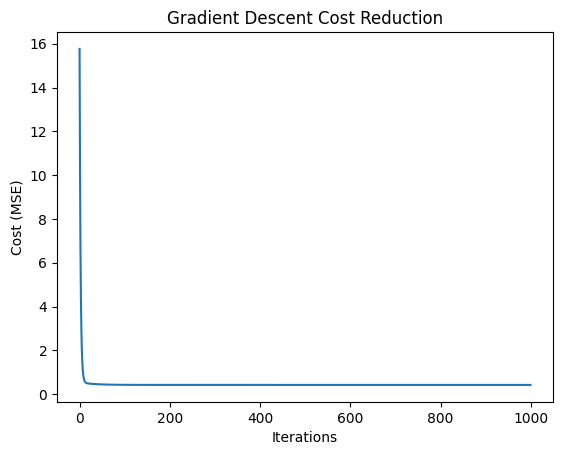

In [7]:
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Cost Reduction")
plt.show()

In [8]:
# Predictions & Evaluation
predictions = w_opt * X_test + b_opt
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Final Weights: w = {w_opt}, b = {b_opt}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Final Weights: w = [2.7993237], b = [4.14291327]
Mean Squared Error: 0.6536995222280376
R² Score: 0.8072059611079998


In [9]:
# Compare with Scikit-Learn
sklearn_model = SklearnLinearRegression()
sklearn_model.fit(X_train, y_train)
sklearn_predictions = sklearn_model.predict(X_test)

In [10]:
print(f"Sklearn Weights: w = {sklearn_model.coef_[0][0]}, b = {sklearn_model.intercept_[0]}")
print(f"Sklearn MSE: {mean_squared_error(y_test, sklearn_predictions)}")


Sklearn Weights: w = 2.7993236574802762, b = 4.142913319458566
Sklearn MSE: 0.6536995137170021


## Summary
- Implemented Linear Regression from scratch.
- Used Gradient Descent for optimization.
- Visualized cost function reduction.
- Compared with Scikit-Learn's implementation.